As our Linear Regression model failed to show much relation between the variables and Global Sales, we decided to further clean the dataset, which was be done by removing more outliers. The first graph shows the original boxplot for Global Sales, which has a large amount of outliers. We removed those values of data for Global Sales that lied outside Q1 and Q3 range, which are the data points which are <25 and >75 percentile of the data. The new boxplot on the right is what we got after removing those outliers.


,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,...,Fighting,Misc,Platform.1,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
count,5124.000000,5124.000000,5124.000000,5124.000000,5124.000000,5124.000000,5124.000000,5124.000000,5124.000000,5124.000000,...,5124.000000,5124.000000,5124.000000,5124.000000,5124.000000,5124.000000,5124.000000,5124.000000,5124.000000,5124.000000
mean,2007.413154,0.455006,0.272822,0.075695,0.096608,0.900252,71.693208,30.904762,7.254606,186.821233,...,0.056596,0.057963,0.062256,0.013856,0.076308,0.083724,0.121780,0.040788,0.163544,0.034738
std,4.112235,0.922152,0.663405,0.315609,0.282706,1.891634,13.118328,19.917532,1.373620,580.348260,...,0.231092,0.233695,0.241644,0.116906,0.265516,0.277000,0.327063,0.197819,0.369897,0.183135
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,21.000000,3.000000,0.500000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,0.080000,0.020000,0.000000,0.010000,0.150000,64.000000,16.000000,6.600000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.190000,0.080000,0.000000,0.030000,0.380000,74.000000,27.000000,7.600000,29.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2010.000000,0.470000,0.250000,0.020000,0.090000,0.920000,81.000000,42.000000,8.300000,104.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2016.000000,15.680000,12.760000,6.500000,10.570000,35.520000,98.000000,113.000000,9.600000,10665.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


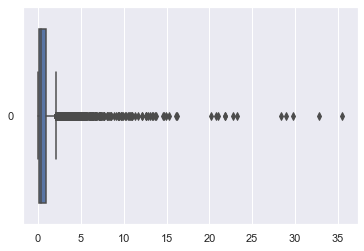

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.formula.api import ols
from scipy import stats
import statsmodels.api as sm
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from math import sqrt

import scipy, matplotlib
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import warnings

mainData = pd.read_csv('clean_dataframe.csv')
sb.set() # set the default Seaborn style for graphics
sb.boxplot(data=mainData['Global_Sales'],orient='h')
mainData.describe()

## Filter outliers

In [2]:
Q1 = mainData['Global_Sales'].quantile(0.25)
Q3 = mainData['Global_Sales'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 
filter = (mainData['Global_Sales']>= Q1 - 1.5 * IQR) & (mainData['Global_Sales'] <= Q3 + 1.5 *IQR)
mainData = mainData.loc[filter]

<AxesSubplot:>

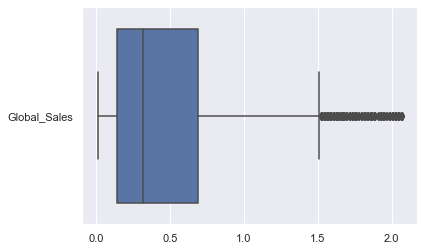

In [5]:
mainData.describe()
Global_Sales = pd.DataFrame(mainData['Global_Sales'])
sb.boxplot(data=Global_Sales,orient='h')

In [6]:
#mainData.to_csv (r'C:\Users\user\Desktop\Introduction To Data Science & Artificial Intelligence\clean_filter_dataframe.csv', index = False, header=True)